In [1]:
from fastbook import *
from fastai.collab import *

print(sys.version)

import fastai; 
print(fastai.__version__)

3.8.10 | packaged by conda-forge | (default, May 11 2021, 07:01:05) 
[GCC 9.3.0]
2.3.1


In [2]:
fontsize = 20 # size for x and y ticks
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams.update({'font.size': fontsize})
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.width', 1000)

In [3]:
#import sys
#!{sys.executable} -m pip install pycodestyle pycodestyle_magic
#!{sys.executable} -m pip install flake8
%load_ext pycodestyle_magic
%flake8_on --ignore E111,E501,E265,E231,E225

1: E999 SyntaxError: invalid syntax


In [4]:
path = untar_data(URLs.ML_SAMPLE)
print(path)

/home/ubuntu/.fastai/data/movie_lens_sample


In [5]:
type(path)

pathlib.PosixPath

In [5]:
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
b = dls.one_batch()
print(type(b))
x,y = b
print(x.shape)
print(y.shape)
print(x[0:10])

<class 'tuple'>
torch.Size([64, 2])
torch.Size([64, 1])
tensor([[53, 74],
        [92, 58],
        [45, 93],
        [92, 10],
        [20, 60],
        [64, 79],
        [71, 71],
        [19,  3],
        [ 4, 53],
        [14, 79]])


In [6]:
dl = dls[0]
print(len(dl))

75


In [7]:
doc(CollabDataLoaders)

In [8]:
ds = dls.dataset
len(ds)

4825

In [9]:
dls.show_batch()

,userId,movieId,rating
0,77,1265,4.0
1,505,539,3.5
2,388,4963,4.0
3,460,2959,3.5
4,537,527,5.0
5,78,4306,1.5
6,509,1721,2.0
7,358,344,1.0
8,615,4993,3.5
9,19,165,3.0


In [10]:
df = pd.read_csv(path/'ratings.csv')
print(len(df))
df.head()

6031


,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [11]:
print(sum(df['userId'] == 73))
print(sum(df['userId'] == 43))

95
0


In dataframe, unique user ids count = 100. Values range from 15 to 665)


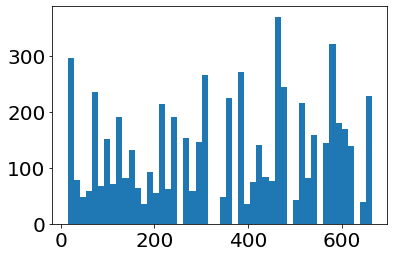

In [12]:
print(f"In dataframe, unique user ids count = {len(df.userId.unique())}. Values range from {min(df.userId)} to {max(df.userId)})")
plt.hist(df.userId.values, bins=50)
plt.show()

In dataset, unique user ids count = 100. Values range from 1 to 100)


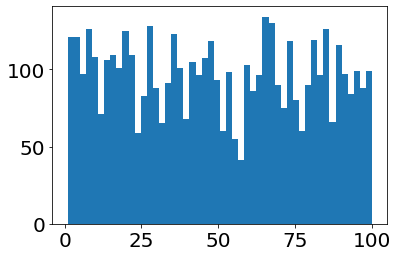

In [13]:
print(f"In dataset, unique user ids count = {len(ds['userId'].unique())}. Values range from {min(ds['userId'])} to {max(ds['userId'])})")
plt.hist(ds['userId'].values, bins=50)
plt.show()

In [14]:
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.497162,1.424191,00:00


epoch,train_loss,valid_loss,time
0,1.368996,1.365934,00:00
1,1.271075,1.187026,00:00
2,1.026815,0.882457,00:00
3,0.798638,0.744095,00:00
4,0.692776,0.710060,00:00
5,0.636421,0.698625,00:00
6,0.623258,0.694715,00:00
7,0.611247,0.691772,00:00
8,0.601961,0.690602,00:00
9,0.588991,0.690483,00:00


In [15]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,63.0,48.0,5.0,2.945541
1,70.0,36.0,4.0,4.012234
2,65.0,92.0,4.5,4.264702
3,47.0,98.0,5.0,4.344506
4,4.0,83.0,3.5,4.335792
5,4.0,38.0,4.5,4.215896
6,59.0,60.0,5.0,4.449829
7,86.0,82.0,4.0,3.805816
8,55.0,86.0,4.5,3.956169


In [16]:
doc(learn.show_results)

In [17]:
inp,target,preds = learn.get_preds(dl=[b], with_decoded=True)
dls.show_results(b, preds, max_n=9)

,userId,movieId,rating,rating_pred
0,53.0,74.0,5.0,3.910507
1,92.0,58.0,4.0,4.158648
2,45.0,93.0,4.0,3.454510
3,92.0,10.0,3.0,2.440045
4,20.0,60.0,4.5,3.890921
5,64.0,79.0,5.0,3.990773
6,71.0,71.0,3.5,4.173306
7,19.0,3.0,4.5,3.982409
8,4.0,53.0,4.0,4.155066


In [18]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(101, 50)
  (i_weight): Embedding(101, 50)
  (u_bias): Embedding(101, 1)
  (i_bias): Embedding(101, 1)
)

In [19]:
doc(collab_learner)

In [20]:
learn2 = collab_learner(dls, n_factors=20, y_range=(0.5,5.5))
learn2.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.527776,1.434031,00:00


epoch,train_loss,valid_loss,time
0,1.383974,1.390435,00:00
1,1.318132,1.270425,00:00
2,1.153997,1.044000,00:00
3,0.946001,0.855845,00:00
4,0.790379,0.768761,00:00
5,0.699519,0.734081,00:00
6,0.676405,0.719969,00:00
7,0.654643,0.713733,00:00
8,0.645888,0.711953,00:00
9,0.643295,0.711612,00:00


In [21]:
learn3 = collab_learner(dls, n_factors=10, y_range=(0.5,5.5))
learn3.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.496230,1.436025,00:00


epoch,train_loss,valid_loss,time
0,1.384055,1.398357,00:00
1,1.333349,1.306006,00:00
2,1.214423,1.134188,00:00
3,1.041398,0.964376,00:00
4,0.897724,0.855162,00:00
5,0.791959,0.797537,00:00
6,0.743464,0.768749,00:00
7,0.718662,0.756165,00:00
8,0.703858,0.751700,00:00
9,0.701000,0.751022,00:00


In [22]:
learn4 = collab_learner(dls, use_nn=True, y_range=(0, 5.5), layers=[100,50])
learn4.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,1.692153,0.852466,00:00
1,0.941436,0.754843,00:00
2,0.703823,0.735677,00:00
3,0.582579,0.701993,00:00
4,0.472596,0.698948,00:00


In [23]:
learn4.show_results()

,userId,movieId,rating,rating_pred
0,24.0,27.0,3.5,3.663435
1,59.0,62.0,4.0,4.371710
2,47.0,25.0,3.5,3.917582
3,47.0,85.0,3.0,3.778590
4,82.0,76.0,3.0,4.172803
5,4.0,7.0,4.0,4.281031
6,78.0,48.0,5.0,3.776752
7,51.0,12.0,4.0,3.592744
8,39.0,39.0,5.0,3.708290
